# Predicting presence of Heart Disease

The dataset contains several columns which are as follows -

1.age : age in years

2.sex : (1 = male; 0 = female)

3.cp : chest pain type

4.trestbps : resting blood pressure (in mm Hg on admission to the hospital)

5.chol : serum cholestoral in mg/dl

6.fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7.restecg : resting electrocardiographic results

8.thalach : maximum heart rate achieved

9.exang : exercise induced angina (1 = yes; 0 = no)

10.oldpeak : ST depression induced by exercise relative to rest

11.slope : the slope of the peak exercise ST segment

12.ca : number of major vessels (0-3) colored by flourosopy

13.thal : 3 = normal; 6 = fixed defect; 7 = reversable defect

14.target : 1 or 0

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\dhruv\DataScienceUdemy\Untitled Folder\heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [110]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
print("The shape of the dataset : ", df.shape)

The shape of the dataset :  (303, 14)


In [8]:
print(" The column names : ", df.columns)

 The column names :  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


<Figure size 720x432 with 0 Axes>

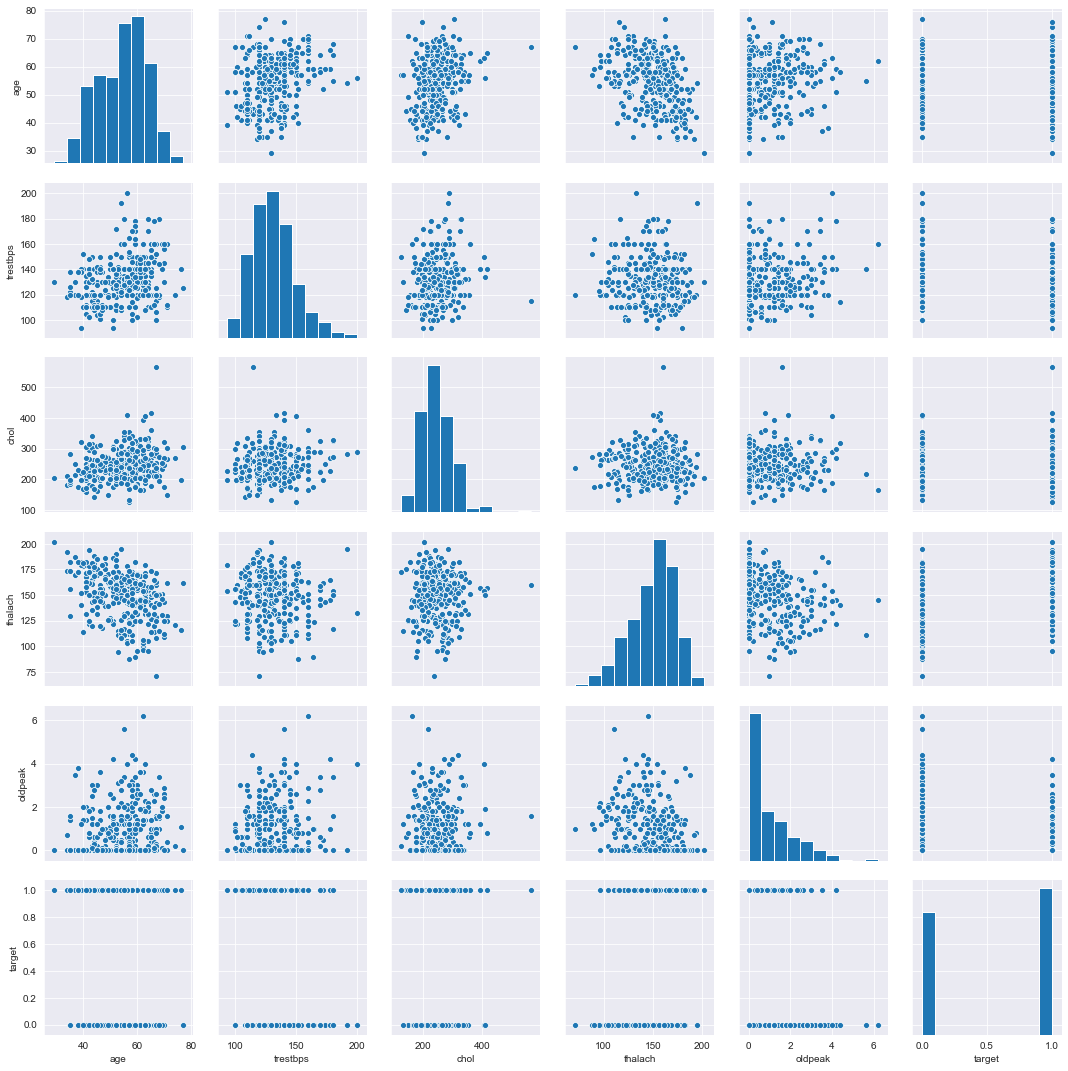

In [97]:
plt.figure(figsize=(10,6))
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]

sns.pairplot(df[num_var])

In [9]:
# df.drop("target", axis=1).apply(lambda x: x.corr(df.target))
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

(14.0, 0.0)

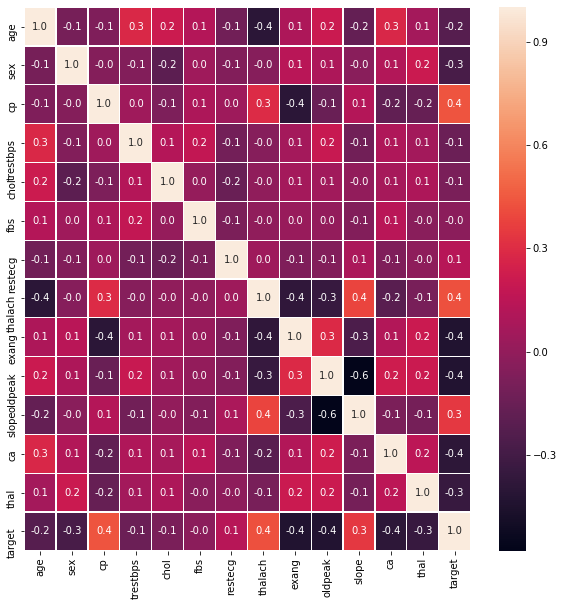

In [10]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(),annot=True,fmt='0.1f',lw=0.2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

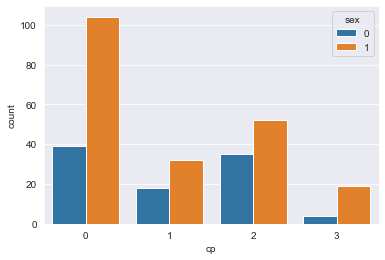

In [77]:
sns.countplot(x=df.cp,hue=df.sex)

In [79]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

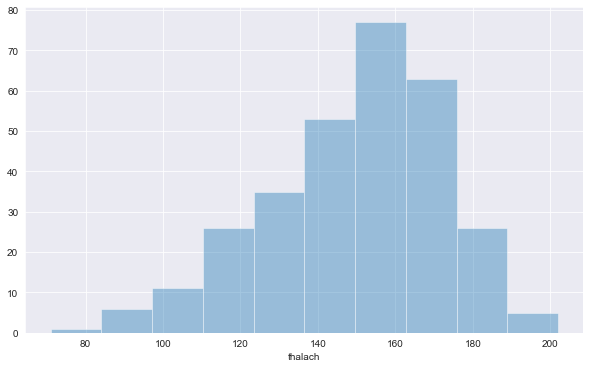

In [83]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, bins=10,kde=False)

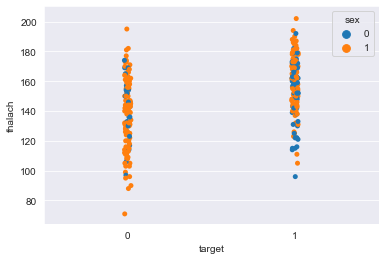

In [88]:
sns.stripplot(x='target',y='thalach',data=df,jitter=0.02,hue='sex')

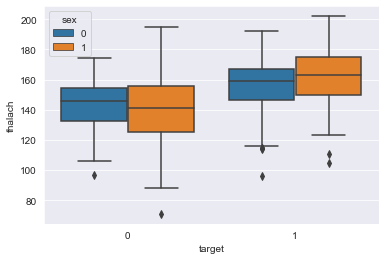

In [90]:
# it clearly depicts that people having heart diesase has higher herat rate
sns.boxplot(x='target',y='thalach',data=df,hue='sex')

Findings of Bivariate Analysis 

Findings of Bivariate Analysis are as follows –

There is no variable which has strong positive correlation with target variable.

There is no variable which has strong negative correlation with target variable.

There is no correlation between target and fbs.

The cp and thalach variables are mildly positively correlated with target variable.

We can see that the thalach variable is slightly negatively skewed.

The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

In [11]:
df['age'].value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

Text(0.5, 1.0, 'Age analysis')

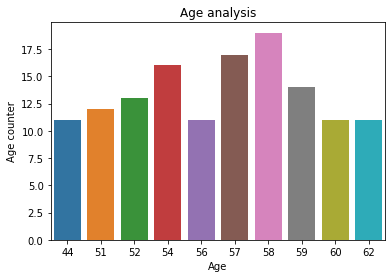

In [12]:
sns.barplot(x=df['age'].value_counts()[:10].index,y=df['age'].value_counts()[:10].values)
plt.xlabel("Age")
plt.ylabel("Age counter")
plt.title("Age analysis")

In [13]:
# checking the % of target columns

HaveNoDisease = len(df[df['target'] == 0])
HaveDisease = len(df[df['target'] == 1])

print(" % of patients having no disease : {:.2f}%".format((HaveNoDisease)/(len(df.target))*100))
print(" % of patients having disease : {:.2f}%".format((HaveDisease)/(len(df.target))*100))

 % of patients having no disease : 45.54%
 % of patients having disease : 54.46%


In [14]:
countFemale = len(df[df['target'] == 0])
countMale = len(df[df['target'] == 1])

print(" % of Female : {:.2f}%".format((countFemale)/(len(df.target))*100))
print(" % of Male : {:.2f}%".format((countMale)/(len(df.target))*100))

 % of Female : 45.54%
 % of Male : 54.46%


In [15]:
young_age = len(df[(df.age>=29) & (df.age<40)])
middle_age = len(df[(df.age>=40) & (df.age<55)])
elderly_age = len(df.target>=55)

print("The Young Age : ",young_age)
print("The Middel Age : ",middle_age)
print("The Elder age : ",elderly_age)

The Young Age :  16
The Middel Age :  128
The Elder age :  303


([<matplotlib.patches.Wedge at 0x1d0c86ba108>,
 [Text(-0.14587807122789376, 1.2917892971900755, 'Young_age'),
  Text(-1.172671637206068, 0.5611071477823464, 'Middle_age'),
  Text(1.1023010766541652, -0.6891533475265632, 'Elderly_age')],
 [Text(-0.1346566811334404, 1.192420889713916, '4%'),
  Text(-1.0824661266517552, 0.5179450594913968, '29%'),
  Text(1.0175086861423064, -0.6361415515629815, '68%')])

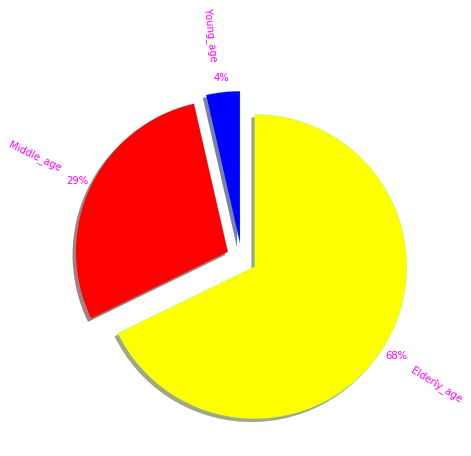

In [16]:
colors = ['blue','red','yellow']
explode = [0.1,0.1,0.1]
wp = {'linewidth' : 0.2,'edgecolor' : 'cyan'}

plt.figure(figsize=(7,7))
plt.pie([young_age,middle_age,elderly_age],labels=['Young_age','Middle_age','Elderly_age'],shadow=True,rotatelabels=True,
        colors=colors,explode=explode,wedgeprops=wp,startangle=90,textprops=dict(color ="magenta"),autopct='%1.0f%%',
       pctdistance=1.1, labeldistance=1.2)

In [17]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

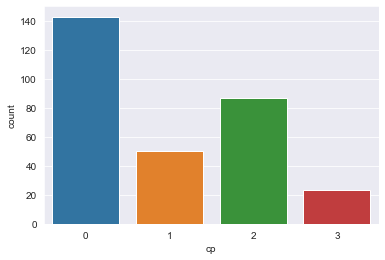

In [18]:
sns.set_style('darkgrid')
sns.countplot(x='cp',data=df)

In [19]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

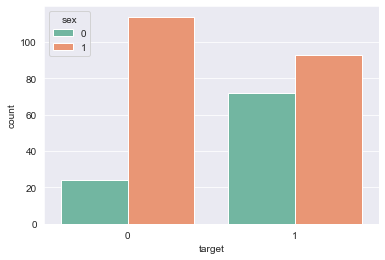

In [20]:
sns.countplot(x=df.target,hue=df.sex,palette='Set2')

In [21]:
# frequency distribution 

df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

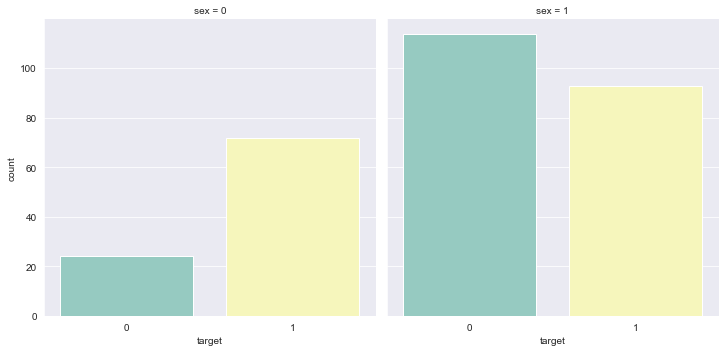

In [22]:
ax = sns.catplot(x="target", col="sex", data=df, kind="count", height=5, aspect=1,palette='Set3')

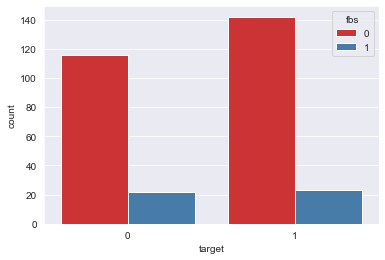

In [23]:
sns.countplot(x=df.target,hue=df.fbs,palette='Set1')

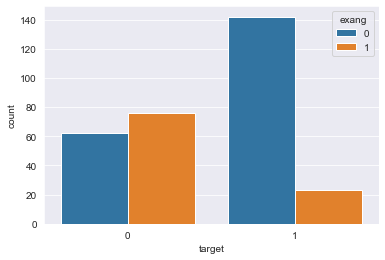

In [24]:
sns.countplot(x=df.target,hue=df.exang)

In [25]:
X = df.drop(['target'],axis=1)
y = df.target

Findings of Univariate Analysis 

Findings of univariate analysis are as follows:-

a. Our feature variable of interest is target.

b. It refers to the presence of heart disease in the patient.

c. It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).

d. 1 stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

Similarly, 0 stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

There are 165 patients suffering from heart disease, and

There are 138 patients who do not have any heart disease.

Out of 96 females - 72 have heart disease and 24 do not have heart disease.

Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

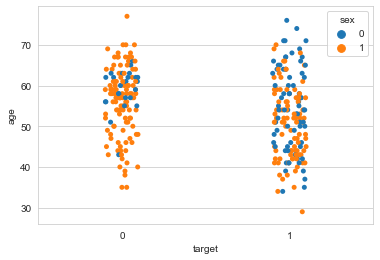

In [100]:
sns.set_style('whitegrid')
sns.stripplot(x='target',y='age',data=df,hue='sex')

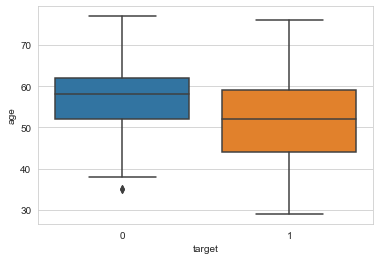

In [103]:
sns.boxplot(x='target',y='age',data=df)

#The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.

#The dispersion or spread of age of the people who have heart disease is greater than the dispersion or spread of age of the 
#people who do not have heart disease.

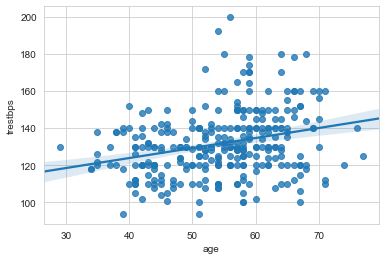

In [104]:
sns.regplot(x='age',y='trestbps',data=df)
# not a good fit line

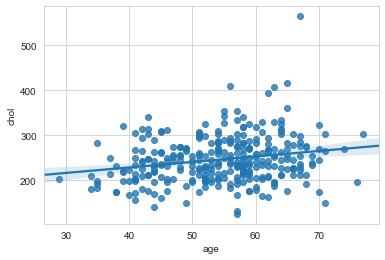

In [105]:
sns.regplot(x='age',y='chol',data=df)
# slighly positive correlation between age and chol variables.

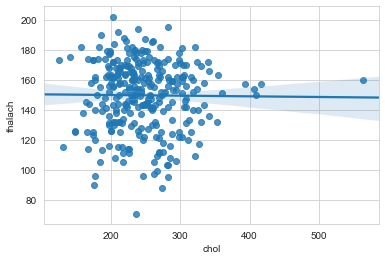

In [106]:
sns.regplot(x='chol',y='thalach',data=df)


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [28]:
# Model Building

# 1. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix 

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

   micro avg       0.87      0.87      0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [35]:
print(confusion_matrix(y_test,pred))

[[24  7]
 [ 1 29]]


In [36]:
# 2. KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [40]:
pred_2 = knn.predict(X_test)

In [41]:
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        31
           1       0.68      0.77      0.72        30

   micro avg       0.70      0.70      0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.70        61



In [42]:
print(confusion_matrix(y_test,pred_2))

[[20 11]
 [ 7 23]]


In [43]:
# elbow method

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

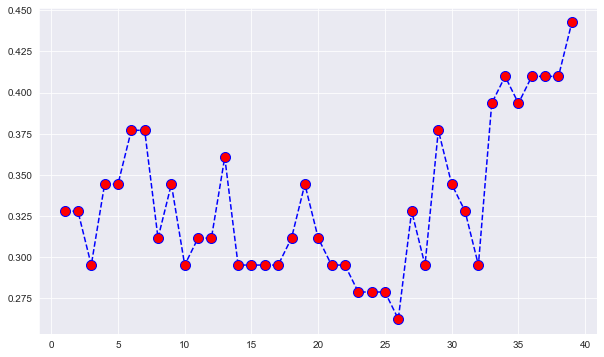

In [44]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue',markersize=10,markerfacecolor='red',marker="o",ls='--')

In [45]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred_all = knn.predict(X_test)
print(classification_report(y_test,pred_all))
print("\n")
print(confusion_matrix(y_test,pred_all))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        31
           1       0.68      0.83      0.75        30

   micro avg       0.72      0.72      0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



[[19 12]
 [ 5 25]]


In [46]:
# 3.SVM

In [47]:
from sklearn.svm import SVC

In [48]:
svm = SVC(random_state=1)

In [49]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
predd = svm.predict(X_test)

In [51]:
print(classification_report(y_test,predd))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.49      1.00      0.66        30

   micro avg       0.49      0.49      0.49        61
   macro avg       0.25      0.50      0.33        61
weighted avg       0.24      0.49      0.32        61



In [52]:
print(confusion_matrix(y_test,predd))

[[ 0 31]
 [ 0 30]]


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'C':[0.1,0.01,10,100,1000] , 'gamma': [0.1,0.001,0.0001,1]}

In [55]:
grid = GridSearchCV(SVC(),param_grid=param_grid,verbose=3)

In [56]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5555555555555556, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5555555555555556, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................... C=0.1, gamma=0.1, score=0.5625, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.5555555555555556, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.5555555555555556, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ................. C=0.1, gamma=0.001, score=0.5625, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .... C=0.1,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=10, gamma=1, score=0.5555555555555556, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......... C=10, gamma=1, score=0.5555555555555556, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ...................... C=10, gamma=1, score=0.5625, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....... C=100, gamma=0.1, score=0.5555555555555556, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....... C=100, gamma=0.1, score=0.5555555555555556, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................... C=100, gamma=0.1, score=0.5625, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..... C=100, gamma=0.001, score=0.6049382716049383, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
C:\Users\dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.01, 10, 100, 1000], 'gamma': [0.1, 0.001, 0.0001, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [57]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [59]:
grid_predict = grid.predict(X_test)

In [60]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       0.74      0.97      0.84        30

   micro avg       0.82      0.82      0.82        61
   macro avg       0.85      0.82      0.82        61
weighted avg       0.85      0.82      0.82        61



In [61]:
print(confusion_matrix(y_test,grid_predict))

[[21 10]
 [ 1 29]]


In [62]:
# 4.Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
nb = GaussianNB()

In [65]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
nb_pred = nb.predict(X_test)

In [67]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [68]:
print(confusion_matrix(y_test,nb_pred))

[[25  6]
 [ 3 27]]


In [69]:
# 5. Random Forest

from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier(n_estimators=1000,random_state=1)

In [71]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [72]:
pred_rf = rf.predict(X_test)

In [73]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

   micro avg       0.85      0.85      0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



In [74]:
print(confusion_matrix(y_test,pred_rf))

[[23  8]
 [ 1 29]]
